In [210]:
from math import *
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

# link lengths of front arm (mm), refer to Jack's IK sketch
a1 = 23.785 #back input link
a2 = 72.253 #shin back
a3 = 35.190 #shin top
a4 = 47.276 #shin forward
a5 = 29.621 #between shin and front input link
a6 = 25.939 #front input link
a7 = 20.200 #between input links
theta7 = radians(34.759) #angle of back input pt to front input pt to world x-axis
theta2 = radians(33.838) #angle between top and back of shin

sin7 = sin(theta7) 
cos7 = cos(theta7)

theta1_range = [radians(75.8), radians(360-6)]
theta6_range = [radians(-103.1), radians(172.3)]



In [202]:
def get_endpt(theta1, theta6, guess):

    sin1 = sin(theta1)
    cos1 = cos(theta1) 
    sin6 = sin(theta6)
    cos6 = cos(theta6)

    def func_sincos(vars):
        sin3, cos3, sin5, cos5 = vars
        return [ 
            a1*cos1 + a3*cos3 - (a7*cos7 + a6*cos6 + a5*cos5),
            a1*sin1 + a3*sin3 - (a7*sin7 + a6*sin6 + a5*sin5),
            sin3**2 + cos3**2 - 1,    
            sin5**2 + cos5**2 - 1,    
        ]
    
    def jac_sincos(vars):
        sin3, cos3, sin5, cos5 = vars
        return [
            [a3, 0, a5, 0],
            [0, a3, 0, a5],
            [2*sin3, 2*cos3, 0, 0],
            [0, 0, 2*sin5, 2*cos5]
        ]
    
    result = root(func_sincos, jac=jac_sincos, x0=guess, method='hybr')
    sol = result.x
    if(result.success == False):
    # if(result.maxcv == False):
        return (0,0), sol
    # sol = root(func_sincos, x0=guess, method='hybr').x
    sin3, cos3, sin5, cos5 = sol

    p1 = (a1*cos1, a1*sin1)
    p6 = (a7*cos7 + a6*cos6, a7*sin7 + a6*sin6)
    p5 = (a1*cos1 + a3*cos3, a1*sin1 + a3*sin3)

    theta3 = atan2(sin3,cos3)

    p2 = (p1[0] + a2*cos(theta3 - theta2), p1[1] + a2*sin(theta3 - theta2))

    return p2, sol

theta1_n = radians(172)
theta6_n = radians(-36)

theta3_guess = radians(-23.3)
theta5_guess = radians(-166.6)
sin3_g = sin(theta3_guess)
cos3_g = cos(theta3_guess)
sin5_g = sin(theta5_guess)
cos5_g = cos(theta5_guess)
guess_n = [sin3_g, cos3_g, sin5_g, cos5_g]

theta_t_max = radians(360-174.406)


get_endpt(theta1_n, theta6_n, guess_n)

((15.660032011350701, -57.37578657816409),
 array([-0.39542719,  0.91849733, -0.23209312, -0.97269357]))

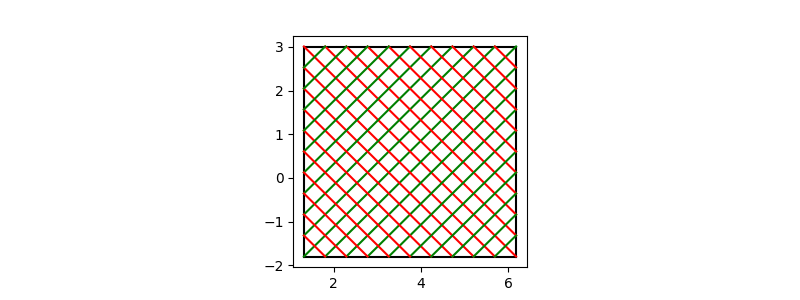

In [142]:
pts_per_line = 50
grid_spacing = 5

theta1_grid = np.linspace(theta1_range[0], theta1_range[1], pts_per_line+1)
theta6_grid = np.linspace(theta6_range[0], theta6_range[1], pts_per_line+1)

plt.figure(figsize=(8,3))
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(np.full(len(theta6_grid), theta1_range[0]), theta6_grid, 'k')
plt.plot(np.full(len(theta6_grid), theta1_range[1]), theta6_grid, 'k')
plt.plot(theta1_grid, np.full(len(theta1_grid), theta6_range[0]), 'k')
plt.plot(theta1_grid, np.full(len(theta1_grid), theta6_range[1]), 'k')

guess = [guess_n]*51


endpos = (theta1_grid, theta6_grid)
plt.plot(endpos[0], endpos[1], 'g')
endpos = (theta1_grid[::-1], theta6_grid)
plt.plot(endpos[0], endpos[1], 'r')
for i in range(1, pts_per_line//grid_spacing):
    endpos = (theta1_grid[:-i*grid_spacing], theta6_grid[i*grid_spacing:])
    plt.plot(endpos[0], endpos[1], 'g')
    endpos = (theta1_grid[i*grid_spacing:], theta6_grid[:-i*grid_spacing])
    plt.plot(endpos[0], endpos[1], 'g')

    endpos = (theta1_grid[:-i*grid_spacing:][::-1], theta6_grid[:-i*grid_spacing:])
    plt.plot(endpos[0], endpos[1], 'r')

    endpos = (theta1_grid[i*grid_spacing::][::-1], theta6_grid[i*grid_spacing::])
    plt.plot(endpos[0], endpos[1], 'r')
# plt.xlabel('theta1')
# plt.ylabel('theta6')


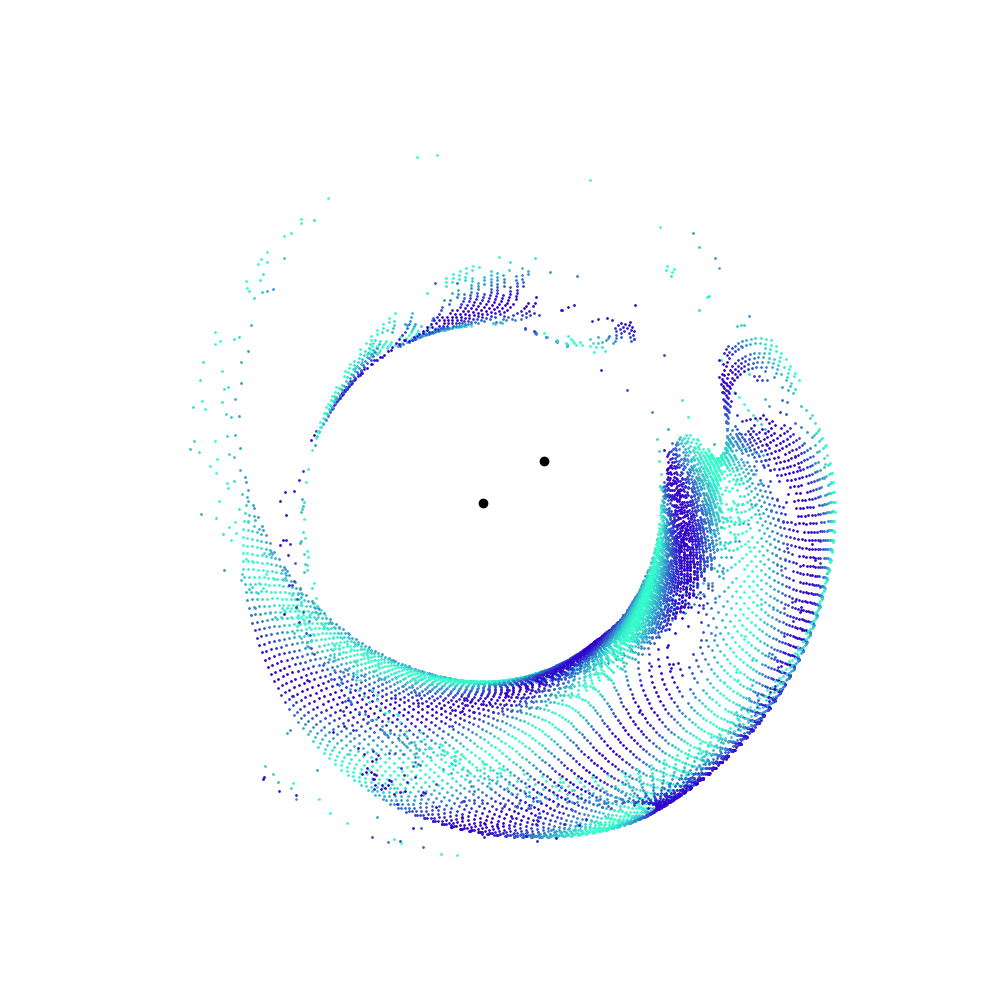

In [209]:
pts_per_line = 100
grid_spacing = 5

theta1_grid = np.linspace(theta1_range[0], theta1_range[1], pts_per_line+1)
theta6_grid = np.linspace(theta6_range[0], theta6_range[1], pts_per_line+1)

theta3_guess = radians(-23.3)
theta5_guess = radians(-166.6)
sin3_g = sin(theta3_guess)
cos3_g = cos(theta3_guess)
sin5_g = sin(theta5_guess)
cos5_g = cos(theta5_guess)
guess = [sin3_g, cos3_g, sin5_g, cos5_g]

# plt.figure()
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
i = 0
for theta1 in theta1_grid:
    xs = []
    ys = []
    i+=1
    for theta6 in theta6_grid:
        pos, sol = get_endpt(theta1, theta6, guess)
        if(pos[0] == 0):
            continue
        # guess = sol
        xs.append(pos[0])
        ys.append(pos[1])
        # print(theta1, y)
    # plt.scatter(xs, ys, s=1)
    plt.scatter(xs, ys, s=1, c=[(0.2, 0.5*(sin(i/5)+1), 0.8)])
    
    # plt.plot(xs, ys)
        # print(theta1)

plt.scatter(0, 0, color='k')
p7 = (a7*cos(theta7), a7*sin(theta7))
plt.scatter(p7[0], p7[1], color='k')
plt.axis('off')
plt.savefig('armworkspace.png', transparent=True, bbox_inches='tight', pad_inches=0)

In [167]:
plt.close('all')

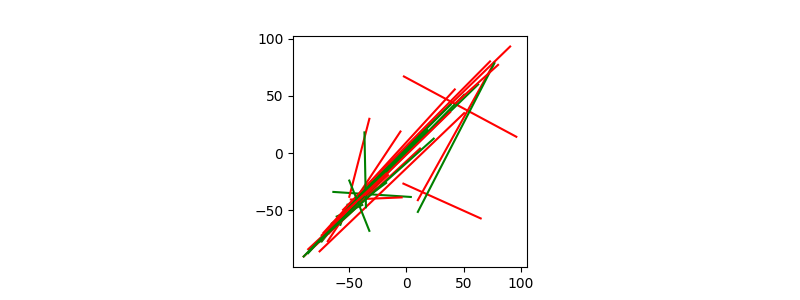

In [110]:
pts_per_line = 50
grid_spacing = 5

theta1_grid = np.linspace(theta1_range[0], theta1_range[1], pts_per_line+1)
theta6_grid = np.linspace(theta6_range[0], theta6_range[1], pts_per_line+1)

plt.figure(figsize=(8,3))
plt.gca().set_aspect('equal', adjustable='box')

# plt.plot(np.full(len(theta6_grid), theta1_range[0]), theta6_grid, 'k')
# plt.plot(np.full(len(theta6_grid), theta1_range[1]), theta6_grid, 'k')
# plt.plot(theta1_grid, np.full(len(theta1_grid), theta6_range[0]), 'k')
# plt.plot(theta1_grid, np.full(len(theta1_grid), theta6_range[1]), 'k')

guess = [guess_n]*51

endpos, guess = fk(theta1_grid, theta6_grid, guess)
plt.plot(endpos[0], endpos[1], 'g')
endpos, guess = fk(theta1_grid[::-1], theta6_grid, guess)
plt.plot(endpos[0], endpos[1], 'r')
for i in range(1, pts_per_line//grid_spacing):
    endpos, guess = fk(theta1_grid[:-i*grid_spacing], theta6_grid[i*grid_spacing:], guess)
    plt.plot(endpos[0], endpos[1], 'g')
    endpos, guess = fk(theta1_grid[i*grid_spacing:], theta6_grid[:-i*grid_spacing], guess)
    plt.plot(endpos[0], endpos[1], 'g')

    endpos, guess = fk(theta1_grid[:-i*grid_spacing:][::-1], theta6_grid[:-i*grid_spacing:], guess)
    plt.plot(endpos[0], endpos[1], 'r')

    endpos, guess = fk(theta1_grid[i*grid_spacing::][::-1], theta6_grid[i*grid_spacing::], guess)
    plt.plot(endpos[0], endpos[1], 'r')
# plt.xlabel('theta1')
# plt.ylabel('theta6')
